In [16]:
# filter
import os
import numpy as np
from wbtool import show
from wbtool.show import wshow
from wbtool import file_misc as fm
import matplotlib.pyplot as plt
from importlib import reload
import proc_data,aux
from onevision import morphology as ovmorph
from onevision import improc,morph_data


vid = np.load('/home/wb/samba_dir/cells_brightfield/leadingcell-WB-entirespan/B1ROI1.npy')
# vid = np.load('/home/wb/samba_dir/cells_brightfield/single-cell-movement-for-machine-learning/A549/0/A4ROI1.npy')
# vid = vid[:7]
vid = proc_data.value_modify(vid)
vid = proc_data.ch_num_modify(vid)

output_dir = '/home/wb/samba_dir/indev/results'
tms = fm.pload(os.path.join(output_dir,'../tms.pk'))
sms = fm.pload(os.path.join(output_dir,'../sms.pk'))
# pms = fm.pload(os.path.join(output_dir,'../pms.pk'))


/home/wb/apps/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
# === processing data
# importlib.reload(aux)

fid = 1
# track_mask=tms[fid]
# seg_mask=sms[fid]
oid = 36
pm = proc_data.overlay_all(vid, [it[36] for it in sms])
proc_data.all2imgfile(pm, 'o36_')

In [2]:
from onevision import trajectory
import aux 
# reload(aux)

tr = trajectory.obj_traject(sms)
miss_sin, miss_seg = aux.locate_missing(tr) # miss single

print(miss_sin)
print(miss_seg)

{1: [10], 3: [9, 12, 14, 38], 4: [6, 13, 20, 33], 5: [6, 13, 33], 6: [7, 12, 18, 20, 24, 26], 7: [7, 11, 17], 8: [9, 13], 9: [18], 10: [12], 11: [5, 12, 27, 33], 12: [5, 25, 39], 13: [2, 9, 37], 14: [24], 15: [18], 16: [9, 12], 17: [19, 21, 36], 18: [1, 7, 11, 21], 19: [26, 28, 30], 21: [30], 22: [16, 23], 23: [13, 33, 35, 37], 24: [7, 11, 17], 25: [10], 26: [18, 27], 27: [18, 32], 28: [23, 38], 29: [18, 22, 35], 30: [29, 38], 31: [13, 25], 32: [2, 4, 25], 34: [5, 15, 26], 35: [10, 14, 18], 36: [8, 15, 24, 37], 37: [10], 38: [9, 32, 34], 39: [7, 20, 36], 40: [10, 17, 21, 36], 42: [13, 33]}
{1: [[0, 1], [6, 7], [13, 15], [17, 24], [27, 30], [32, 40]], 3: [[0, 4], [16, 19], [29, 32], [34, 36]], 4: [[0, 0], [2, 4], [40, 40]], 5: [[0, 3], [25, 26]], 6: [[0, 5], [40, 40]], 7: [[0, 4], [40, 40]], 8: [[1, 7], [18, 20], [28, 30], [40, 40]], 9: [[0, 6], [12, 14], [20, 22], [27, 28], [30, 33]], 10: [[0, 6], [20, 21], [33, 34], [39, 40]], 11: [[0, 2], [9, 10], [20, 22], [24, 25], [29, 31], [35, 4

In [11]:
from wbtool.use_models import cv
# reload(cv)

# SA = cv.sam_agent('prompt')
SA2 = cv.sam_agent('auto')

In [4]:
# from wbtool import dm
# reload(dm)
reload(aux)
import copy

# ids,coords = proc_data.read_coords_from_csv('/home/wb/samba_dir/cells_brightfield/leadingcell-WB-entirespan/Results_B1ROI1.csv')

segtracker_args = {
    'sam_gap': 1, # the interval to run sam to segment new objects
    'min_area': 20, # minimal mask area to add a new mask as a new object
    'max_obj_num': 255, # maximal object number to track in a video
    'min_new_obj_iou': 0.8, # the area of a new object in the background should > 80% 
    'new_replace_iou_min': 0.5,
    'remain_remove_max':0.4,
    'min_obj_area_ratio':0.0001,
    'max_obj_area_ratio':0.01
}

nsms = aux.fix(vid[:5], copy.deepcopy(sms[:5]), SA, segtracker_args)


>> start single missing fix
{13: [2], 18: [1], 32: [2]}
>> start gap filling
{1: [[0, 1]], 4: [[0, 0], [2, 4]], 5: [[0, 3]], 8: [[1, 4]], 11: [[0, 2]], 12: [[0, 2]], 13: [[0, 0], [4, 4]], 15: [[0, 2]], 16: [[0, 2]], 17: [[0, 2], [4, 4]], 21: [[2, 4]], 23: [[0, 1], [4, 4]], 24: [[0, 3]], 27: [[1, 3]], 28: [[1, 2]], 30: [[0, 2]], 31: [[0, 0], [3, 4]], 32: [[0, 0], [4, 4]], 34: [[0, 2]], 35: [[3, 4]]}


44 197
0 255


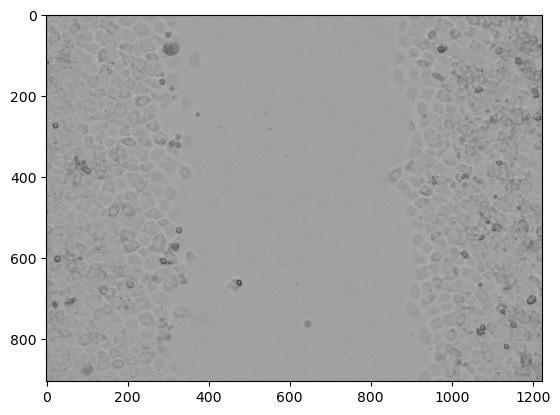

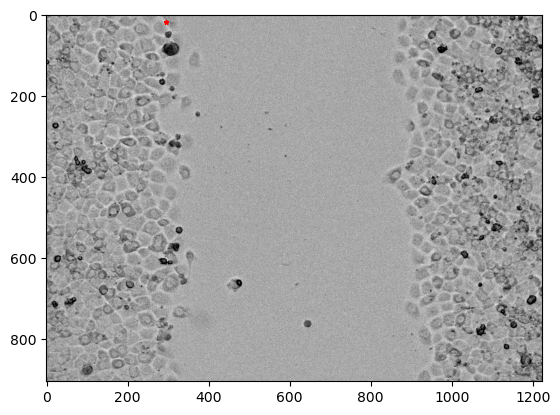

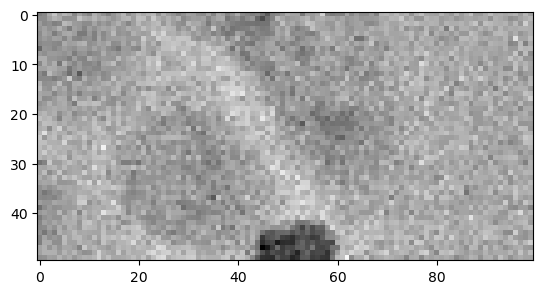

In [3]:
from onevision import morphology as ovmorph
from wbtool import show
# reload(improc)

cellid = 1
gap = miss_seg[cellid][1]

tp = sms[gap[0]-1][cellid]
pp = ovmorph.mass_center([tp]) #pp is len 1 list.
pp = np.array(pp)
tpp = sms[gap[0]-2][cellid]
ppp = ovmorph.mass_center([tpp]) #pp is len 1 list.
ppp = np.array(ppp)

obj_mode = np.ones((len(pp), 1))
frame = vid[gap[0]]
frame = proc_data.value_modify(frame)
a = improc.dynamic_range(frame, 3)
print(frame.min(), frame.max())
print(a.min(), a.max())
wshow(frame)

Mp,mc = aux.extrapolate_mask(tpp,tp,True)
mc = np.array([mc])
show.overlay_point(a, pp)
# wshow(Mp)

# M = SA.infer(a, point_prompt=pp)[0]
# M = SA.infer(a, mask_prompt=[tp])[0]

# extract patch
patch = a[0:50, 250:350]
wshow(patch)
# M = SA2.infer(patch)

In [1]:
import numpy as np
from onevision import morphology as ovmorph
from skimage import morphology as skmorph
from wbtool.show import wshow
a = np.load('../b.npy')


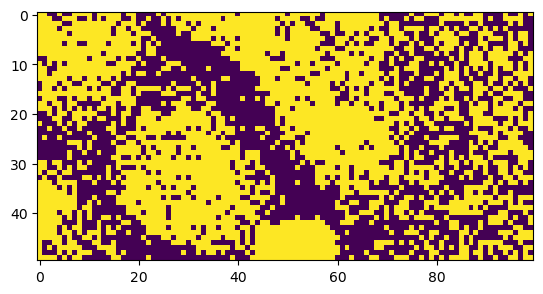

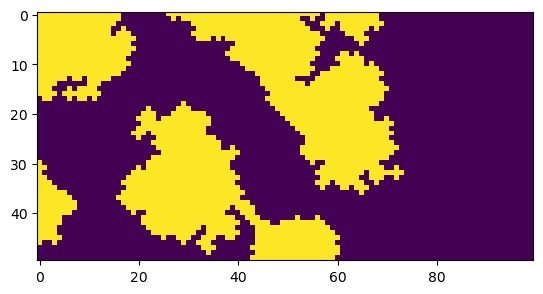

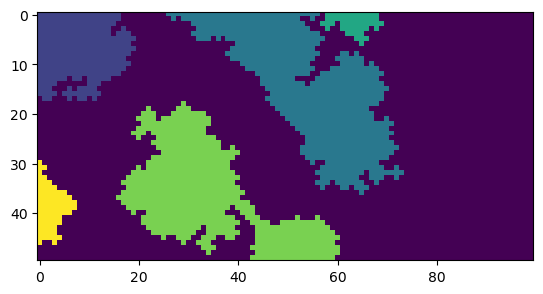

In [21]:
# reload(ovmorph)
from scipy import ndimage
b = a<170
wshow(b)
c = skmorph.binary_dilation(skmorph.binary_erosion(b))
# c = skmorph.binary_erosion(skmorph.binary_dilation(b))
# wshow(c)
d = ovmorph.fill_holes(c, 50)
# wshow(d)
d = ovmorph.remove_small_dots(d, 50)
wshow(d)
e,_ = ndimage.label(d)
wshow(e)